In [75]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import joblib


In [21]:
# loading the dataset
credit_card = pd.read_csv('creditcard.csv')

In [22]:
credit_card.head()  # displaying the first 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
credit_card.info()  # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
# dropping duplicate values

credit_card = credit_card.drop_duplicates()
credit_card.duplicated().sum()

0

In [29]:
credit_card.isnull().sum()  # checking for missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
credit_card['Class'].value_counts()  # checking the number of legit and fraudulent transactions

Class
0    283253
1       473
Name: count, dtype: int64

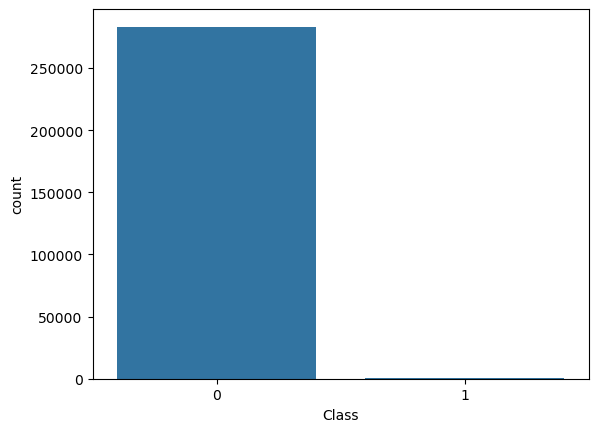

In [33]:
sns.barplot(credit_card['Class'].value_counts())
plt.show()

In [35]:
# separating the legit and fraudulent transactions for analysis
legit = credit_card[credit_card.Class==0]
fraud = credit_card[credit_card.Class==1]

In [37]:
# checking their shapes
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [39]:
# statistics of the data
print(legit.Amount.describe())
print(fraud.Amount.describe())

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [41]:
# comparing mean values for both transactions
credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [43]:
# Balancing the data by using downsampling

legit_sample = legit.sample(n=473)

In [45]:
# concatenating the two dataframes

new_credit = pd.concat([legit_sample, fraud], axis=0)

In [47]:
new_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
67252,52433.0,-1.318909,0.767210,0.769378,-0.105324,0.132193,-0.512896,0.954400,0.048608,-0.274164,...,-0.324412,-0.732844,0.389115,0.146838,-0.603290,-0.072834,0.245478,0.287508,66.55,0
281978,170575.0,0.316142,0.573795,-1.647302,-0.121954,3.379915,3.422912,0.869682,0.402176,-0.952280,...,0.211761,0.792648,-0.164168,0.761723,-0.334381,0.179419,0.056567,-0.028443,37.82,0
85492,60792.0,-2.789562,3.191002,-3.961612,-0.240684,0.815497,2.719776,-1.790503,3.309531,-0.833081,...,0.234843,0.148485,0.361722,0.983295,-0.214562,-0.379960,-0.027142,0.084918,0.70,0
88553,62189.0,1.214049,0.301701,0.276748,0.643976,-0.191704,-0.605098,0.002738,-0.060429,0.041257,...,-0.261231,-0.722002,0.160278,0.031651,0.140692,0.124447,-0.007032,0.027148,1.29,0
14980,26294.0,-1.300859,1.021509,1.483073,-1.421083,-0.272220,-1.103067,0.789018,-0.209487,0.829896,...,-0.247281,-0.295031,-0.057183,0.402167,-0.231178,0.707201,0.395701,0.198644,27.00,0


In [49]:
new_credit['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

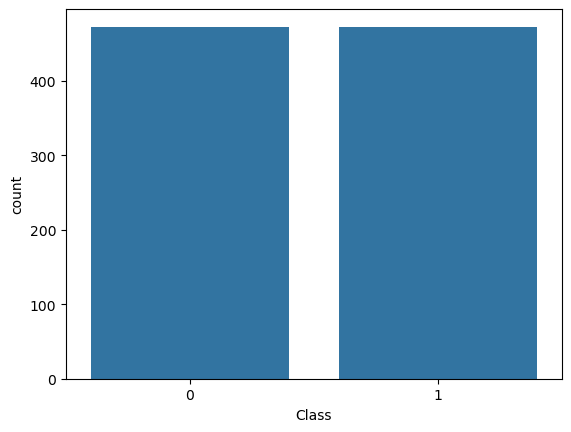

In [51]:
sns.barplot(new_credit['Class'].value_counts())
plt.show()

In [53]:
new_credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94729.773784,0.042026,0.060154,0.108244,-0.013322,-0.028605,-0.006617,-0.011792,-0.020308,0.033169,...,-0.062209,-0.007842,0.072282,0.025804,-0.013393,-0.003917,-0.014888,-0.002547,0.007519,72.542431
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [55]:
# splitting the data into features

X = new_credit.drop(columns='Class', axis=1)
Y = new_credit['Class']

In [57]:
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
67252    52433.0 -1.318909  0.767210  0.769378 -0.105324  0.132193 -0.512896   
281978  170575.0  0.316142  0.573795 -1.647302 -0.121954  3.379915  3.422912   
85492    60792.0 -2.789562  3.191002 -3.961612 -0.240684  0.815497  2.719776   
88553    62189.0  1.214049  0.301701  0.276748  0.643976 -0.191704 -0.605098   
14980    26294.0 -1.300859  1.021509  1.483073 -1.421083 -0.272220 -1.103067   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [59]:
# splitting data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (662, 30) (284, 30)


In [63]:
# Training the Model with training data
model = LogisticRegression()
model.fit(X_train, Y_train)


C:\Users\jj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
# Evaluating model based on accuracy score, f1 score, precision score and recall score

X_train_pred = model.predict(X_train) 
print('Accuracy score on training data: ', accuracy_score(X_train_pred, Y_train)*100) 
print('Precision score on training data: ', precision_score(X_train_pred, Y_train)*100)
print('f1 score on training data: ', f1_score(X_train_pred, Y_train)*100)
print('recall score on training data: ', recall_score(X_train_pred, Y_train)*100)

Accuracy score on training data:  94.25981873111783
Precision score on training data:  93.05135951661632
f1 score on training data:  94.18960244648316
recall score on training data:  95.3560371517028


In [67]:
# test data
X_test_pred = model.predict(X_test)
print('Accuracy Score on test data: ',  accuracy_score(X_test_pred, Y_test)*100)
print('Precision Score on test data: ',  precision_score(X_test_pred, Y_test)*100)
print('f1_score on test data: ',  f1_score(X_test_pred, Y_test)*100)
print('Recall score on test data: ',  recall_score(X_test_pred, Y_test)*100)

Accuracy Score on test data:  93.30985915492957
Precision Score on test data:  90.84507042253522
f1_score on test data:  93.14079422382672
Recall score on test data:  95.55555555555556


In [53]:
# saving the model
joblib.dump(model, "credit_card_fraud_model.pkl")

['credit_card_fraud_model.pkl']

In [69]:
mod = joblib.load("credit_card_fraud_model.pkl") # loading the model for utilisation

In [71]:
# using the trained model to predict if transaction is legit or fraudulent
pred = mod.predict([[0.0, -1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

C:\Users\jj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [164]:
pred[0]

0

In [73]:
if pred[0] == 0:
    print("legit Transcation")
else:
    print("Fraud Transaction")

legit Transcation
